<a href="https://colab.research.google.com/github/alirezash97/Time-frequency-analysis-course/blob/main/denoising_assignment/wavelet_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from matplotlib.pyplot import imshow
from skimage.util import random_noise
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt
import pywt, numpy
import matplotlib.image as mpimg
import numpy as np
from skimage.transform import resize



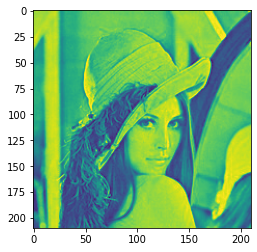

In [20]:
img = mpimg.imread('/content/lenna.jpg')
img = img[:, :, 0] # one channel
imshow(img)

2.7372323488584405


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  


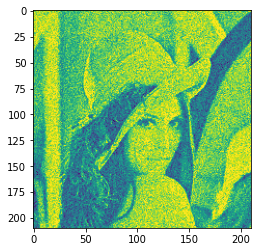

In [21]:
noise_img = random_noise(img, mode='gaussian')
print(peak_signal_noise_ratio(img, noise_img))
imshow(noise_img)

In [23]:
data = noise_img
coeffs = pywt.dwt2(data, 'haar')
cA, (cH, cV, cD) = coeffs

In [24]:
subbands = []
subbands.append(cA)
subbands.append(cH)
subbands.append(cV)
subbands.append(cD)

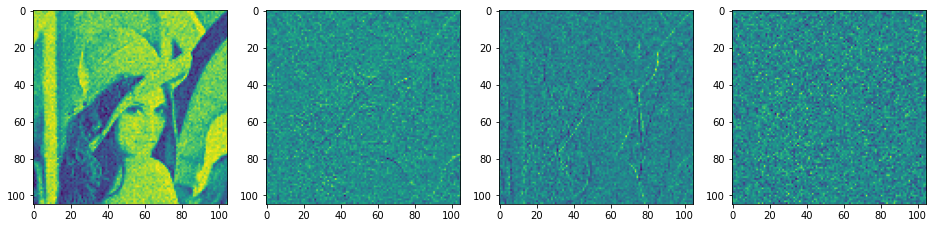

In [25]:
fig=plt.figure(figsize=(16, 16))

for i in range(1, 5):

  img = np.array(subbands[i-1])
  fig.add_subplot(1, 4, i)
  imshow(img)
plt.show()

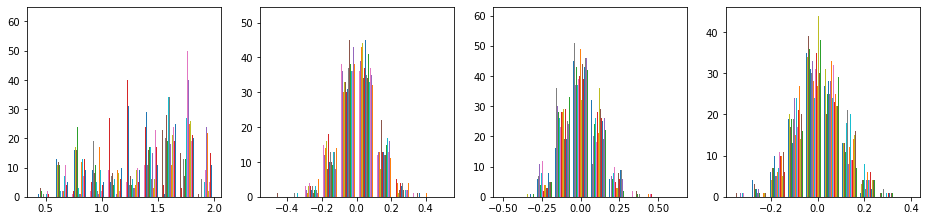

In [37]:
fig=plt.figure(figsize=(16, 3.5))

for i in range(1, 5):

  img = np.array(subbands[i-1])
  fig.add_subplot(1, 4, i)
  plt.hist(img)
plt.show()

In [38]:
# low pass filter on cD (mean threshold)

threshold = np.mean(cD)
new_cD = np.zeros((cD.shape))
for i in range(cD.shape[0]):
  for j in range(cD.shape[1]):
    if cD[i, j] > threshold:
      pass
    else:
      new_cD[i, j] = cD[i, j] 

In [39]:
new_coeff = cA, (cH, cV, new_cD)

8.696717884347983


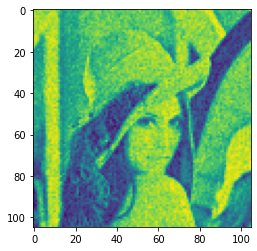

In [50]:
reconstructed_image = pywt.idwt2(new_coeff, 'haar')
reconstructed_image = resize(reconstructed_image, (img.shape[0], img.shape[1]),
                       anti_aliasing=True)
print(peak_signal_noise_ratio(img, reconstructed_image))
imshow(reconstructed_image)

In [ ]:
# As you can see, PSNR was 2.73 for noisy image and after using dwt and applying a 
# low pass filter to one of the subbands(cD based on histogram), the PSNR improved to 8.69
# still noisy!